In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('IPL.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

In [7]:
df.shape

(74, 20)

In [8]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

## 1) Which team won most matches?

In [16]:
match_wins = df['match_winner'].value_counts()
match_wins

match_winner
Gujarat      12
Rajasthan    10
Banglore      9
Lucknow       9
Punjab        7
Delhi         7
Kolkata       6
Hyderabad     6
Chennai       4
Mumbai        4
Name: count, dtype: int64

C:\Users\vatsc\AppData\Local\Temp\ipykernel_21788\4213865568.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = match_wins.index, y = match_wins.values,palette='viridis')


Text(0.5, 1.0, 'Matches won by Teams')

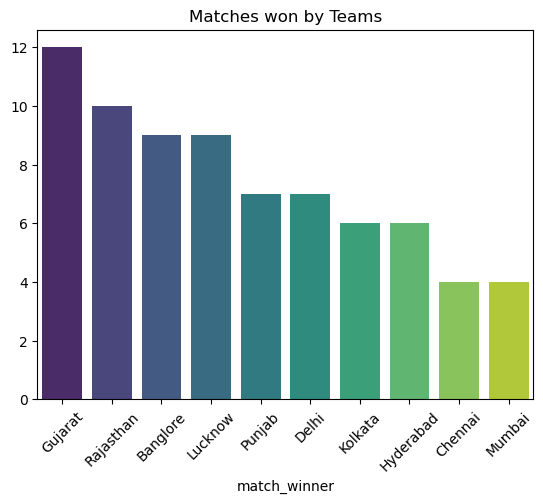

In [21]:
sns.barplot(x = match_wins.index, y = match_wins.values,palette='viridis')
plt.xticks(rotation=45)
plt.title('Matches won by Teams')

## 2) Toss Decision trends

<Axes: xlabel='toss_decision', ylabel='count'>

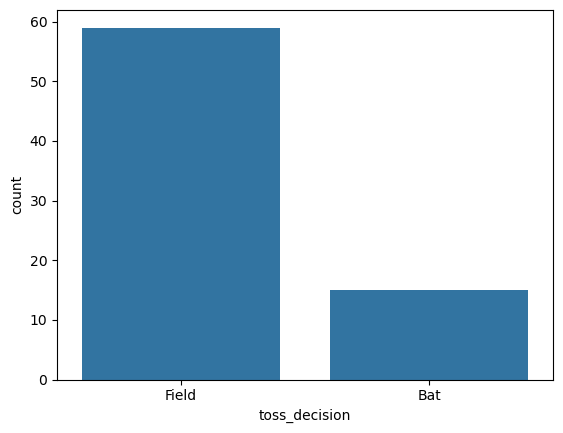

In [35]:
sns.countplot(x = df['toss_decision'])

Text(0, 0.5, 'Teams')

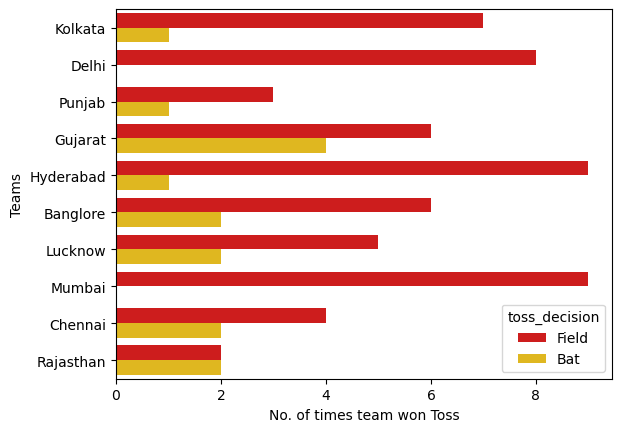

In [40]:
sns.countplot(y = df['toss_winner'], hue = df['toss_decision'] , palette= 'hot')
plt.xlabel('No. of times team won Toss')
plt.ylabel('Teams')

## 3) Toss winners VS Match winners

In [41]:
df.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20


In [80]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
perc = (count*100)/df.shape[0]
print('Percentage of Teams winning toss and match:',perc.round(2))

Percentage of Teams winning toss and match: 48.65


## 4) How did Team win? 
(Run vs Wickets)

In [87]:
df['won_by'].value_counts()

won_by
Wickets    37
Runs       37
Name: count, dtype: int64

Text(0.5, 1.0, 'Teams won by Run VS Wickets')

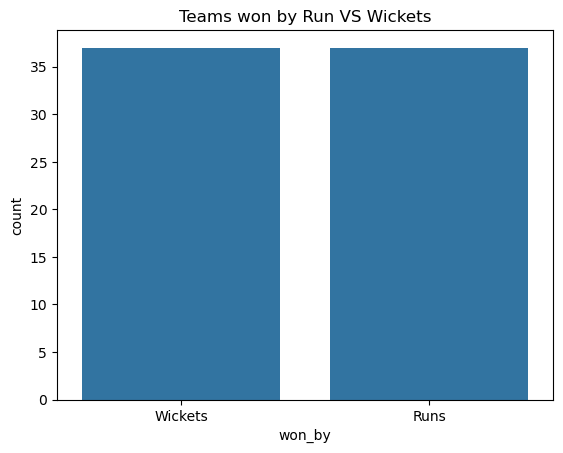

In [91]:
sns.countplot(x = df['won_by'])
plt.title('Teams won by Run VS Wickets')

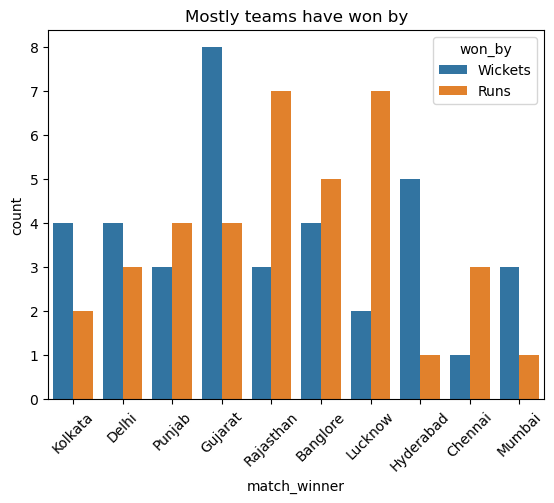

In [99]:
sns.countplot(x=df['match_winner'],hue=df['won_by'])
plt.xticks(rotation=45)
plt.title('Mostly teams have won by')
plt.show()


## 5) Key Player Performance

In [100]:
df.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20


In [105]:
pcounts = df['player_of_the_match'].value_counts().head(10)
pcounts

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Shubman Gill         2
Avesh Khan           2
Dinesh Karthik       2
Hardik Pandya        2
Rahul Tripathi       2
Name: count, dtype: int64

C:\Users\vatsc\AppData\Local\Temp\ipykernel_21788\1681964715.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = pcounts.index,x = pcounts.values, palette = 'mako')


Text(0.5, 1.0, 'Top 10 Man of the Match')

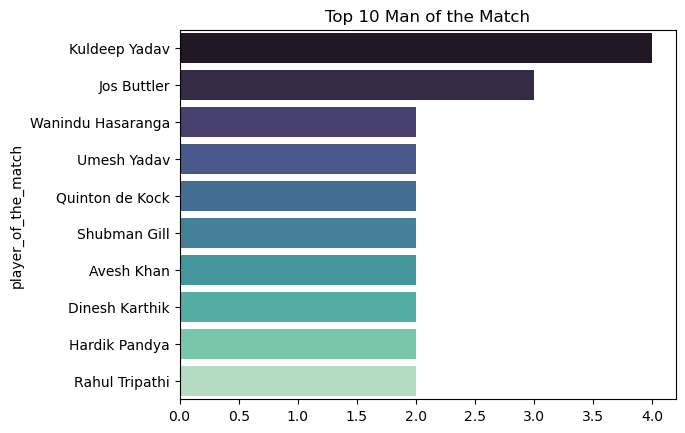

In [108]:
sns.barplot(y = pcounts.index,x = pcounts.values, palette = 'mako')
plt.title('Top 10 Man of the Match')

## 6) 2 Top scorers

In [110]:
# 2 columns for this so we use groupby
# 1 - top_scorer , 2 - highscore

high = df.groupby('top_scorer')
high
# still high is just a groupby obj returning nothing

In [113]:
high = df.groupby('top_scorer')['highscore'].sum()
high
# here the runs are aggregated, not of a single match but sum of all occurences of that player to be top_scorer

top_scorer
Abhishek Sharma        122
Aiden Markram           57
Andre Russell          119
David Miller            94
David Warner           213
Deepak Hooda           114
Devon Conway           143
Dinesh Karthik          66
Faf du Plessis         257
Hardik Pandya          154
Ishan Kishan           180
Jos Buttler            651
KL Rahul               351
Kane Williamson         57
Liam Livingstone       239
MS Dhoni                86
Mitchell Marsh         152
Moeen Ali               93
Nitish Rana             57
Pat Cummins             56
Quinton de Kock        377
Rahul Tripathi         147
Rajat Patidar          112
Riyan Parag             56
Ruturaj Gaikwad         99
Sai Sudharsan           65
Sanju Samson            54
Sherfane Rutherford     28
Shikhar Dhawan         158
Shimron Hetmyer         59
Shivam Dube             95
Shubman Gill           288
Suryakumar Yadav        68
Tilak Varma             51
Virat Kohli            131
W. Saha                190
Yashasvi Jaiswal 

In [117]:
# here we sort and extract top 2 players with their total score 

high = df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
high

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64

<Axes: ylabel='top_scorer'>

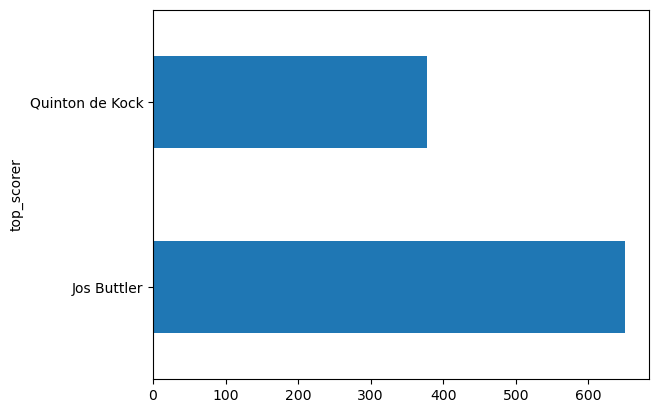

In [127]:
# sns won't work as it expects cols not Series
# so we use Pandas directly to plot

high.plot(kind='barh')

## 7) 10 Best Bowling Figures

In [128]:
df.head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20


In [131]:
# making another column with highest wicket
df['highest_wickets'] = df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,...,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20,3
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,...,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18,3
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,...,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59,2
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,...,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25,3
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,...,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22,3


In [133]:
# converting str to int
df['highest_wickets']=df['highest_wickets'].astype(int)  

In [136]:
top_bowlers = df.groupby('best_bowling')['highest_wickets'].sum().sort_values(ascending=False).head(10)
top_bowlers

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: highest_wickets, dtype: int64

<Axes: ylabel='best_bowling'>

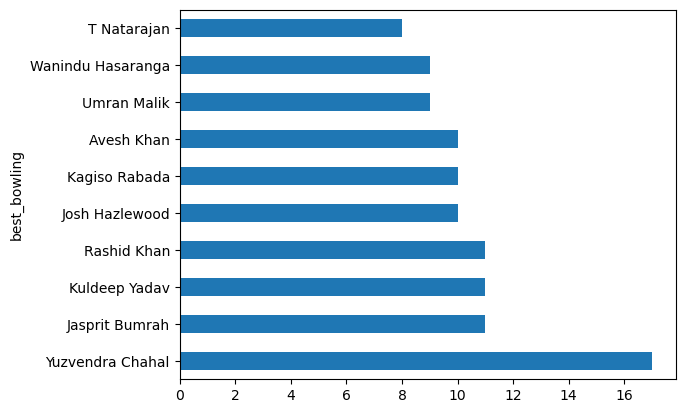

In [137]:
top_bowlers.plot(kind='barh')

## 8) Most Matches played by Venue 

In [139]:
venue = df['venue'].value_counts()
venue

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64

<Axes: ylabel='venue'>

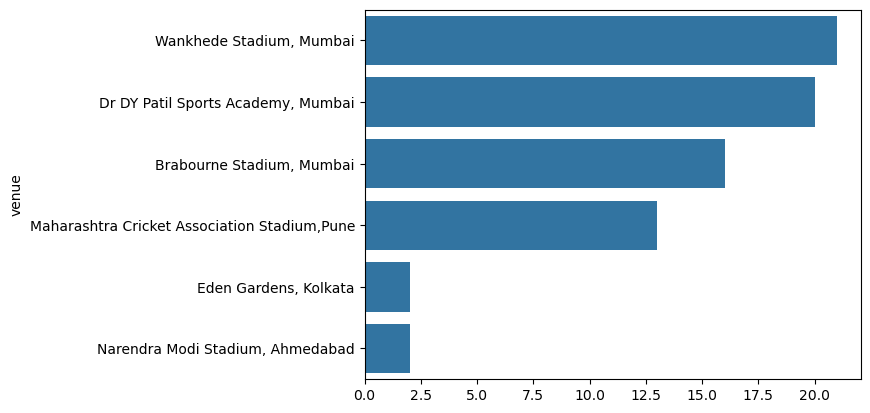

In [142]:
sns.barplot(y = venue.index, x = venue.values)


## 9) Who won Highest margin by runs?

In [145]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
54,55,"May 8,2022","Dr DY Patil Sports Academy, Mumbai",Chennai,Delhi,Group,Delhi,Field,208,6,...,10,Chennai,Runs,91,Devon Conway,Devon Conway,87,Moeen Ali,3--13,3


In [146]:
df[df['won_by'] == 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','won_by','margin']]

,match_winner,won_by,margin
54,Chennai,Runs,91


## 10) Which player had highest Individual Score

In [148]:
df[df['highscore']==df['highscore'].max()]

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,...,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure,highest_wickets
65,66,"May 18,2022","Dr DY Patil Sports Academy, Mumbai",Kolkata,Lucknow,Group,Lucknow,Bat,210,0,...,8,Lucknow,Runs,2,Quinton de Kock,Quinton de Kock,140,Mohsin Khan,3--20,3


In [150]:
df[df['highscore']==df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


## 11) Which bowler has best bowling figure?

In [154]:
df[df['highest_wickets']==df['highest_wickets'].max()][['best_bowling','best_bowling_figure','highest_wickets']]

,best_bowling,best_bowling_figure,highest_wickets
29,Yuzvendra Chahal,5--40,5
39,Umran Malik,5--25,5
53,Wanindu Hasaranga,5--18,5
55,Jasprit Bumrah,5--10,5


In [159]:
df[df['highest_wickets']==df['highest_wickets'].max()][['best_bowling','best_bowling_figure','highest_wickets']].sort_values(by = 'best_bowling_figure',ascending=True).head(1)

,best_bowling,best_bowling_figure,highest_wickets
55,Jasprit Bumrah,5--10,5
